### Material de apoio {.unnumbered}

1. Vídeo sobre como apresentar um argumento de forma convincente com dados, focando em visualizações: Storytelling with Data. Cole Nussbaumer Knaflic. Talks at Google . Disponível em: https://www.youtube.com/watch?v=8EMW7io4rSI

    b) Outro exemplo da mesma autora que discute um caso específico e como melhorar os gráficos inciais e fazer uma apresentação no final: https://www.youtube.com/watch?v=Hfx1X9WSGYQ 

O Livro de mesmo nome (também com edição em português: Storytelling com dados) também é uma ótima leitura sobre visualização, que não entre em detalhes técnicos de implementação apenas boas práticas e como apresentar para o público alvo.

2. How Charts Lie: Getting Smarter about Visual Information. CAIRO, Alberto.  W. W. Norton & Company.
3. An Introduction to Empirical Legal Research. Epstein & Martin. Parte IV (introdução) Capítulos 10 e 11. Visualização é foco do item 10.2.

In [40]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

# Pieplots e Barplots

Vamos criar um conjunto de dados simulando resposta a um questionário que fizemos

In [41]:
df = pd.DataFrame(
    columns=["Activities", "proportion"],
    data=[("Walking", 40), ("Cycling", 24), ("Swimming", 18),
         ("Golf", 12), ("Other", 6)]
)
df.head()

,Activities,proportion
0,Walking,40
1,Cycling,24
2,Swimming,18
3,Golf,12
4,Other,6


<span style="color:red"> *O código retornou um tabela com 5 linhas e 2 colunas. As colunas são "Activities" e "proportion".*

## Piechart

Text(0.5, 1.0, 'Favorite Activities: Results of a Survey with 256 people')

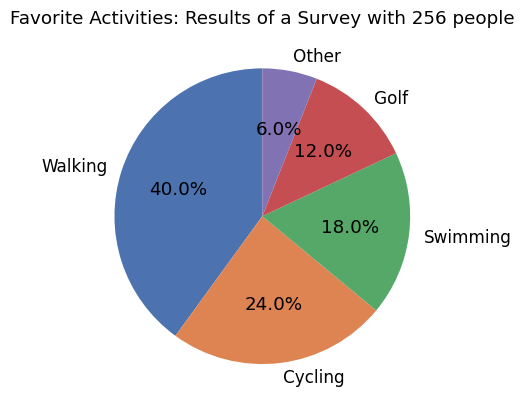

In [42]:
labels = df.Activities
sizes = df.proportion

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.set_title("Favorite Activities: Results of a Survey with 256 people")
# ax1.set_xlabel("Esse é o eixo X")
# ax1.set_ylabel("Esse é o eixo Y")

<span style="color:red"> *O código retornou um gráfico em formato de pizza dividido em 5 partes. A maior parte possui o título Walking e representa 40% da "pizza". As informações utilizadas são as mesmas da tabela anterior.*

## Gráfico de barras no matplotlib

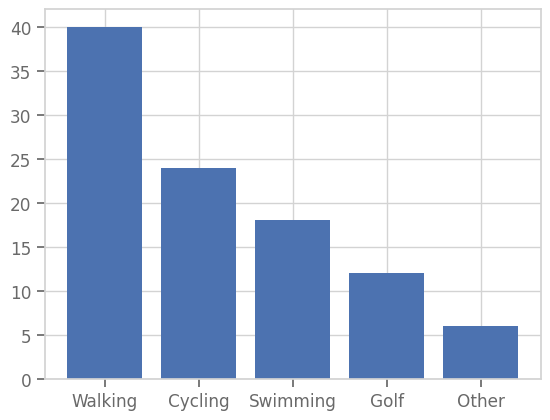

In [43]:
simplest_bars_matplotlib = plt.bar(df.Activities, df.proportion)

<span style="color:red"> *O código retornou um gráfico de barras verticais. O eixo y abrange o intervalo de 0 a 40. No eixo x, podemos identificar 5 barras em ordem decrescente: Walking, Cycling, Swimming, Golf e Other.*

In [44]:
type(simplest_bars_matplotlib)

matplotlib.container.BarContainer

## Gráfico de barras no seaborn

In [45]:
df

,Activities,proportion
0,Walking,40
1,Cycling,24
2,Swimming,18
3,Golf,12
4,Other,6


<span style="color:red"> *O código retornou um tabela com 5 linhas e 2 colunas. As colunas são "Activities" e "proportion".*

<Axes: xlabel='Activities', ylabel='proportion'>

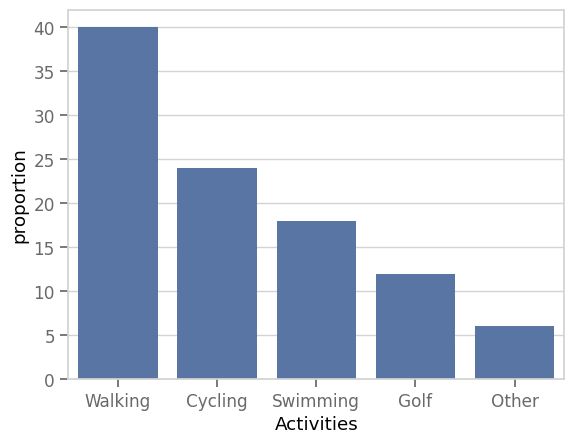

In [46]:
simple_bars = sns.barplot(x="Activities", y="proportion", data=df)

simple_bars

<span style="color:red"> *O código retornou um gráfico de barras mais elaborado que o anterior. Agora temos o título "proportion" no eixo y e o título "Activities" no eixo x. As barras continuam seguindo o mesmo tamanho e ordem, mas com cores distintas.*

Vamos fazer alguns ajustes

Text(0.5, 1.0, 'Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas')

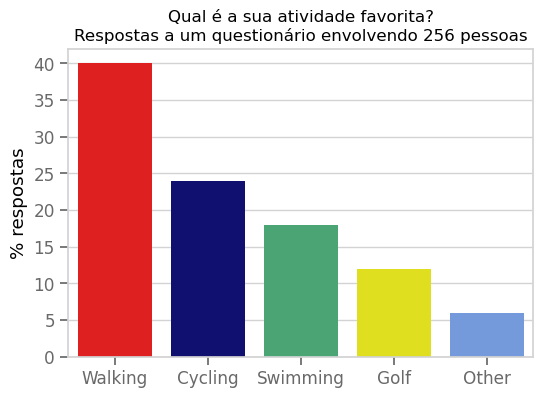

In [47]:
# vamos usar esse formato antes dos gráficos
fig, ax = plt.subplots(figsize=(6,4))


sns.barplot(
    x="Activities", y="proportion", data=df,
    hue="Activities",
    palette={"Walking" : "red",
             "Cycling" : "navy",
             "Swimming" : "mediumseagreen",
             "Golf" : "yellow",
             "Other" : "cornflowerblue"},
    ax=ax
)

# Altera label de cada eixo
ax.set_xlabel("")
ax.set_ylabel("% respostas")

# Cria título
plt.title("Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas", fontsize=12)

# Linha abaixo salva o texto
# simple_bars.get_figure().savefig("simple_bars.png", dpi=600)

<span style="color:red"> *O código retornou um gráfico de barras ainda mais elaborado. Na parte superior, está escrito o título "Qual é a sua atividade favorita? Respostas a um questionário envolvendo 256 pessoas". O eixo y possui o título "% respostas". As barras possuem cores distintas.*

O gráfico acima ainda apresenta certos problemas. O que as cores significam, por exemplo? Podemos nos livrar das cores para fazer um gráfico um pouco mais esparso e, portanto, claro:

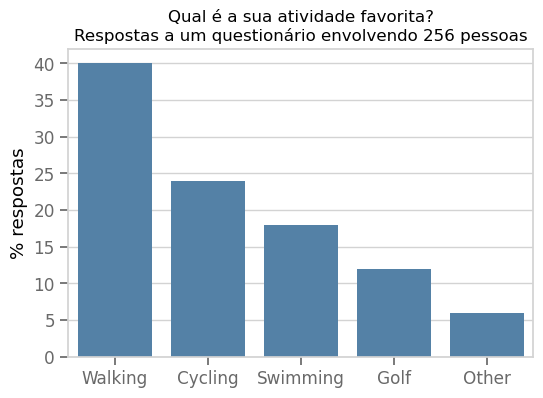

In [48]:
fig, ax = plt.subplots(figsize=(6,4))

simple_bars = sns.barplot(
    x="Activities", y="proportion",
    data=df,
    color="steelblue",
    ax=ax,
)

simple_bars.set_xlabel("")
simple_bars.set_ylabel("% respostas")

plt.title("Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas", fontsize=12)

simple_bars.get_figure().savefig("simple_bars.png", dpi=600)

<span style="color:red"> *O gráfico é igual ao anterior, mas todas as barras possuem agora a mesma cor.*

Assim, você pode usar as cores para contar uma história. Você pode, por exemplo, querer destacar o fato de que as pessoas gostam de nadar (suponha que você está fazendo essa apresentação para justificar a abertura de um novo clube de natação).

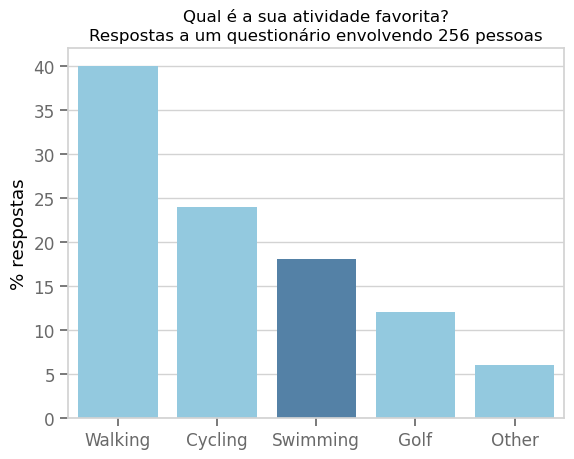

In [49]:
simple_bars = sns.barplot(
    x="Activities", y="proportion", data=df,
    hue="Activities",
    palette={"Walking" : "skyblue",
             "Cycling" : "skyblue",
             "Swimming" : "steelblue",
             "Golf" : "skyblue",
             "Other" : "skyblue"}
)

simple_bars.set_xlabel("")
simple_bars.set_ylabel("% respostas")

simple_bars.set_title("Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas", fontsize=12)

simple_bars.get_figure().savefig("simple_bars.png", dpi=600)

Text(0.5, 1.0, 'Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas')

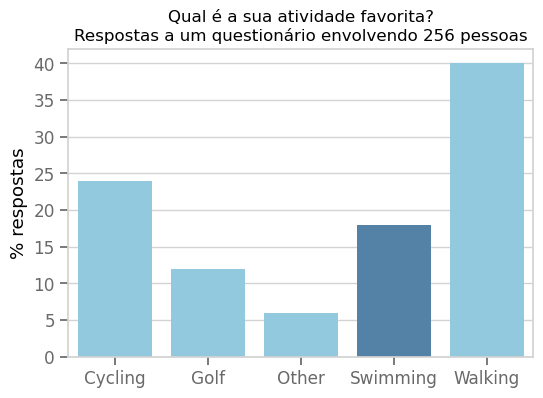

In [50]:
# vamos usar esse formato antes dos gráficos
fig, ax = plt.subplots(figsize=(6,4))

# vamos ordenar alfabeticamente o df
df_ordenado = df.sort_values(by="Activities")


sns.barplot(
    x="Activities", y="proportion", data=df_ordenado,
    hue="Activities",
    palette={"Walking" : "skyblue",
             "Cycling" : "skyblue",
             "Swimming" : "steelblue",
             "Golf" : "skyblue",
             "Other" : "skyblue"},
    ax=ax
)

# Altera label de cada eixo
ax.set_xlabel("")
ax.set_ylabel("% respostas")

# Cria título
plt.title("Qual é a sua atividade favorita?\nRespostas a um questionário envolvendo 256 pessoas", fontsize=12)

# Linha abaixo salva o texto
# simple_bars.get_figure().savefig("simple_bars.png", dpi=600)

<span style="color:red"> *O gráfico possui as mesmas informações do anterior, mas a barra Swimming está em destaque com uma cor diferente.*

Nesse caso, faz sentido chamar a atenção para a informação também no título:

Text(0.5, 1.0, 'Um questionário com 256 respostas mostra que\ncerca de 1/5 das pessoas têm a natação como sua atividade favorita')

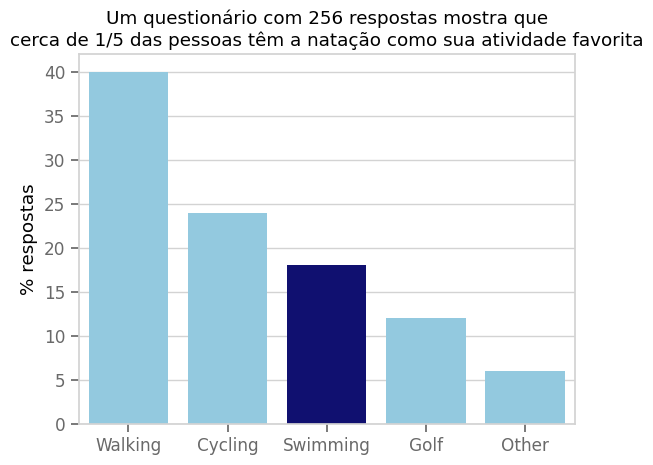

In [51]:
simple_bars = sns.barplot(
    x="Activities", y="proportion", data=df,
    hue="Activities",
    palette={"Walking" : "skyblue",
             "Cycling" : "skyblue",
             "Swimming" : "navy",
             "Golf" : "skyblue",
             "Other" : "skyblue"}
)

simple_bars.set_xlabel("")
simple_bars.set_ylabel("% respostas")

plt.title("Um questionário com 256 respostas mostra que\ncerca de 1/5 das pessoas têm a natação como sua atividade favorita")

# simple_bars.get_figure().savefig("simple_bars.png", dpi=600)

<span style="color:red"> *O gráfico é igual ao anterior, mas agora o título é "Um questionário com 256 respostas mostra que cerca de 1/5 das pessoas têm a natação como sua atividade favorita".*

# Representando o tempo -  gráficos para exibir a variação de uma medida 

Gráficos de barra funcionam muito bem para compararmos valores de categorias diferentes. Mas se queremos exibir a variação de algo ao longo do tempo, qual a melhor forma de fazê-lo?

Vamos carregar os dados de eleição de mulheres em parlamentos

In [52]:
#carregando dados
df_historico_mulheres = pd.read_csv("https://bit.ly/womanparlClean")

Vamos exibir no Brasil

In [63]:
df_historico_br = df_historico_mulheres.query("Country == 'Brazil' and Year >= 1985 and Year != 2003")

# Senado
senado_br = df_historico_br.query("`Chamber Type` == 'Upper'")

# Camara
camara_br = df_historico_br.query("`Chamber Type` == 'Lower' ")

senado_br.head(2)

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
478,Brazil,AME,Yes,1986,NaN,Upper,71.0,0.0,0.000000,NaN
480,Brazil,AME,Yes,1990,NaN,Upper,81.0,2.0,0.024691,NaN


## Opção 1 - Barras

<Axes: xlabel='Year', ylabel='Total women'>

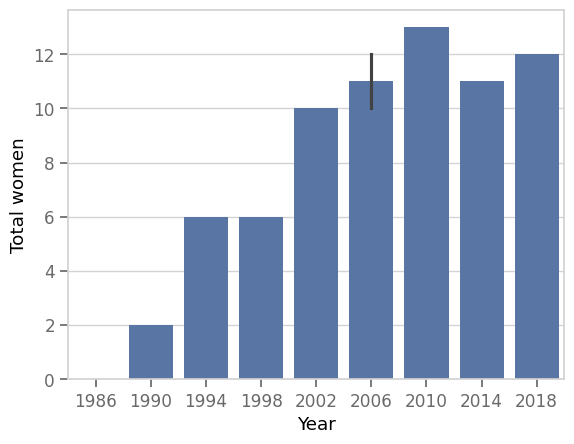

In [64]:
sns.barplot(data=senado_br, x='Year', y='Total women')

<span style="color:red"> *O código acima retornou um gráfico de barras na vertical. O eixo y possui o título "Total women" e apresenta o intervalo entre 0 e 12. A maior parte das barras está no canto direito do gráfico. O eixo x possui o título "Year" e abrange o invervalo de 1945 a 2018. Os números, escritos horizontalmente, estão se embaralhando.*

Esse gráfico está horrível, temos muito o que melhorar. 

Começando por um problema substantivo, a barra de erro em 2006 ocorre porque há mais de um valor. Vamos manter apenas o último

In [65]:
senado_br.query("Year == 2006")

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
489,Brazil,AME,Yes,2006,October,Upper,81.0,12.0,0.148148,NaN
490,Brazil,AME,Yes,2006,December,Upper,81.0,10.0,0.123457,Partial renewal. Four women were elected to th...


<span style="color:red"> *A tabela possui duas linhas e 10 colunas. As colunas são: Country; Region; Election / Renewal; Year; Month; Chamber Type; Chamber Total Seats; Total women; % Of Women in Chamber; e NOTES.*

In [56]:
senado_br = senado_br.drop_duplicates(subset=['Year'], keep='last')

Ainda, se optarmos por usar gráfico de barra nessa situação, temos muito o que melhorar nesse gráfico, como fizemos no tópico anterior. 

In [57]:
camara_br

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
477,Brazil,AME,Yes,1986,NaN,Lower,487.0,26.0,0.053388,NaN
479,Brazil,AME,Yes,1990,NaN,Lower,503.0,28.0,0.055666,NaN
481,Brazil,AME,Yes,1994,NaN,Lower,513.0,36.0,0.070175,NaN
483,Brazil,AME,Yes,1998,NaN,Lower,513.0,29.0,0.056530,NaN
485,Brazil,AME,Yes,2002,NaN,Lower,513.0,44.0,0.085770,NaN
488,Brazil,AME,Yes,2006,NaN,Lower,513.0,45.0,0.087719,NaN
491,Brazil,AME,Yes,2010,NaN,Lower,513.0,44.0,0.085770,NaN
493,Brazil,AME,Yes,2014,NaN,Lower,513.0,51.0,0.099415,NaN
495,Brazil,AME,Yes,2018,October,Lower,513.0,77.0,0.150097,NaN


In [58]:
#increase text size
sns.set_theme(font_scale=1.1,
    style={
        "axes.edgecolor": "lightgray",
        "ytick.color": "dimgrey",
        "xtick.color": "dimgrey",
        "axes.grid": True,
        "grid.color": "lightgray",
        "axes.axisbelow": True,
    },
)

Text(0.0, 1.0, 'Número de deputadas eleitas por eleição no Brasil 1986-2018')

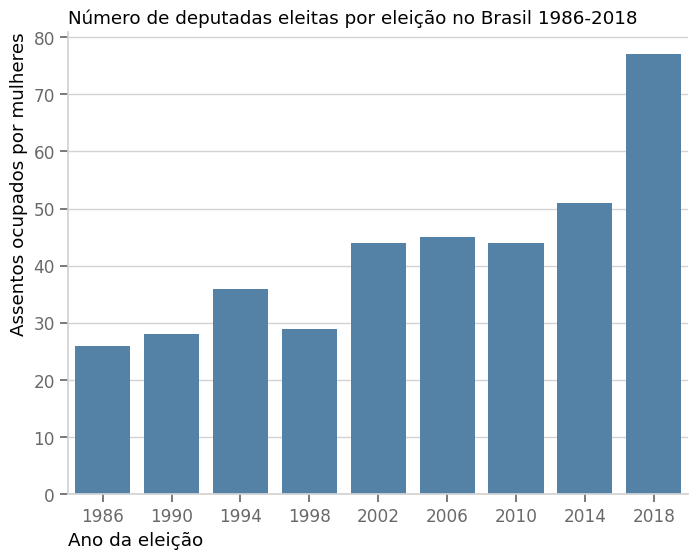

In [59]:
fig, ax = plt.subplots(figsize=(8,6))


sns.barplot(
    data=camara_br,
    x='Year', y='Total women',
    color='steelblue',
    ax=ax
)

sns.despine(ax=ax)

# plt.xticks(rotation=45) # Rotaciona labels
plt.xlabel("Ano da eleição", loc="left")
plt.ylabel("Assentos ocupados por mulheres", loc="top")
plt.title("Número de deputadas eleitas por eleição no Brasil 1986-2018", loc="left")

<span style="color:red"> *O gráfico de barras acima possui as mesmas informações que o anterior, porém organizadas de forma mais clara. Acima está o título "Número de Senadoras eleitas por ano no Brasil 1945-2018". Todas as barras possuem a mesma cor. Os números de cada ano estão legíveis e dispostos diagonalmente. A escala do gráfico é maior.*

## Opção 2 - Lineplot

A princípio, vamos manter as informações e fine tuning que fizemos. Assim podemos apenas trocar o gráfico.

Text(0.0, 1.0, 'Número de deputadas eleitas por eleição no Brasil 1986-2018')

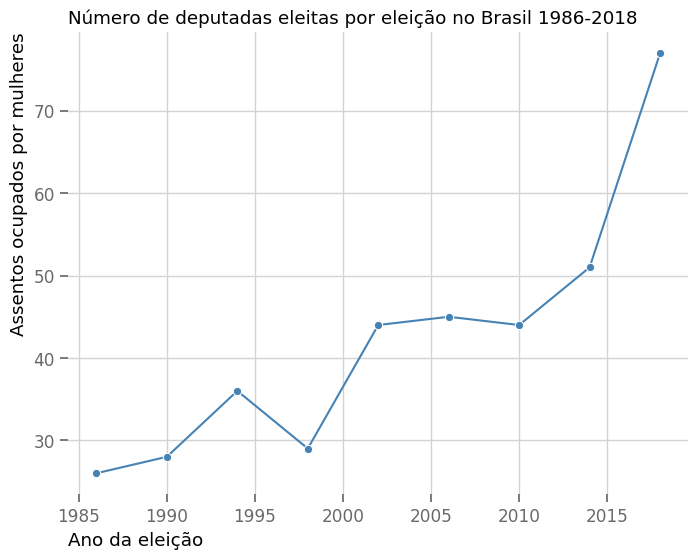

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(
    data=camara_br,
    x='Year', y='Total women',
    color='steelblue',
    marker='o',
    ax=ax
)


sns.despine(ax=ax, left=True, bottom=True)

# plt.xticks(rotation=45) # Rotaciona labels
plt.xlabel("Ano da eleição", loc="left")
plt.ylabel("Assentos ocupados por mulheres", loc="top")
plt.title("Número de deputadas eleitas por eleição no Brasil 1986-2018", loc="left")

In [73]:
df_historico_br

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
477,Brazil,AME,Yes,1986,NaN,Lower,487.0,26.0,0.053388,NaN
478,Brazil,AME,Yes,1986,NaN,Upper,71.0,0.0,0.000000,NaN
479,Brazil,AME,Yes,1990,NaN,Lower,503.0,28.0,0.055666,NaN
480,Brazil,AME,Yes,1990,NaN,Upper,81.0,2.0,0.024691,NaN
481,Brazil,AME,Yes,1994,NaN,Lower,513.0,36.0,0.070175,NaN
482,Brazil,AME,Yes,1994,NaN,Upper,81.0,6.0,0.074074,NaN
483,Brazil,AME,Yes,1998,NaN,Lower,513.0,29.0,0.056530,NaN
484,Brazil,AME,Yes,1998,NaN,Upper,81.0,6.0,0.074074,NaN
485,Brazil,AME,Yes,2002,NaN,Lower,513.0,44.0,0.085770,NaN
486,Brazil,AME,Yes,2002,NaN,Upper,81.0,10.0,0.123457,NaN


Text(0, 1.0, 'Percentual de representes mullheres eleitas no Brasil 1986-2018')

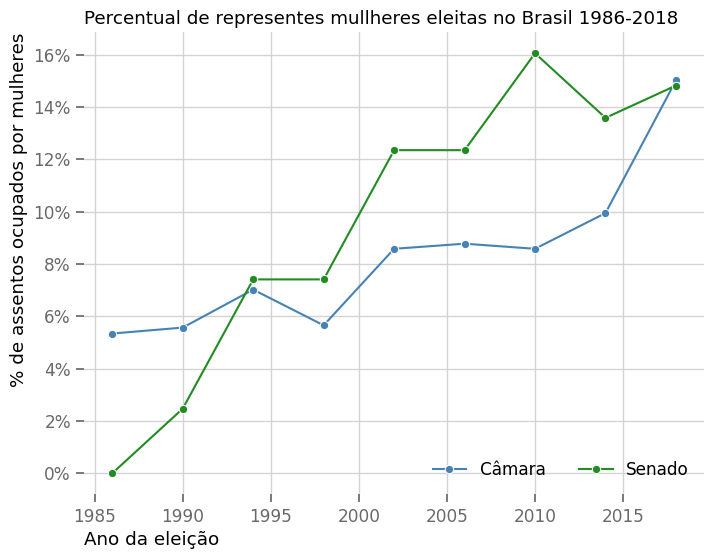

In [109]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(
    data=df_historico_br.drop_duplicates(subset=['Year', 'Chamber Type'], keep='last'),
    x='Year', y='% Of Women in Chamber',
    palette=['steelblue', 'forestgreen'],
    hue='Chamber Type',
    marker='o',
    ax=ax,
)


sns.despine(ax=ax, left=True, bottom=True)

sns.move_legend(ax, "lower right", ncol=2, labels=['Câmara', 'Senado'], frameon=False, title="")


# convert y ticks to percent
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# plt.xticks(rotation=45) # Rotaciona labels
ax.set_xlabel("Ano da eleição", loc="left")
ax.set_ylabel("% de assentos ocupados por mulheres", loc="top")
ax.set_title("Percentual de representes mullheres eleitas no Brasil 1986-2018", loc="left", x=0)

Text(0, 1.0, 'Percentual de representes mullheres eleitas no Brasil 1986-2018')

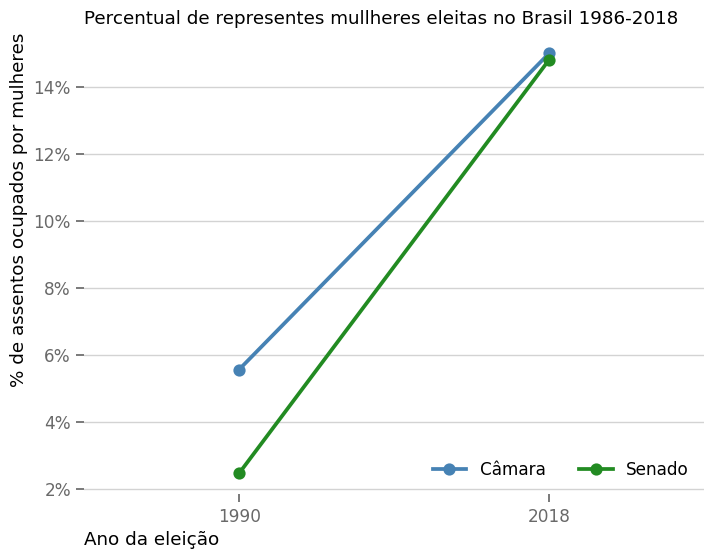

In [111]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(
    data=df_historico_br.query("Year == 1990 or Year == 2018"),
    x='Year', y='% Of Women in Chamber',
    palette=['steelblue', 'forestgreen'],
    hue='Chamber Type',
    ax=ax
)


sns.despine(ax=ax, left=True, bottom=True)

# move legend to bottom
sns.move_legend(ax, "lower right", ncol=2, labels=['Câmara', 'Senado'], frameon=False, title="")

# convert y ticks to percent
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# plt.xticks(rotation=45) # Rotaciona labels
plt.xlabel("Ano da eleição", loc="left")
plt.ylabel("% de assentos ocupados por mulheres", loc="top")
plt.title("Percentual de representes mullheres eleitas no Brasil 1986-2018", loc="left", x=0,)

<span style="color:red"> *O código acima retornou um gráfico de linha com as mesmas informações que o anterior. A linha ascende ao final do gráfico, entre 1990 e 2020.*

Para deixar um pouco mais claro quando medimos os dados podemos também usar um pointplot. Vamos rotacionar os labels em outro ponto dessa vez.

**DICA:** Um efeito semelhante para marcar os pontos de medida poderia ser alcançado com o argumento marker no lineplot. Se quisermos usar um ponto basta passar para a função `marker="o"`, mas [temos várias opções de marcador que poderiam ser usadas, e nem todas fazem sentido para nosso objetivo.](https://matplotlib.org/stable/api/markers_api.html). Teste essa alteração no código acima.

Text(0, 0.5, '# de Senadoras')

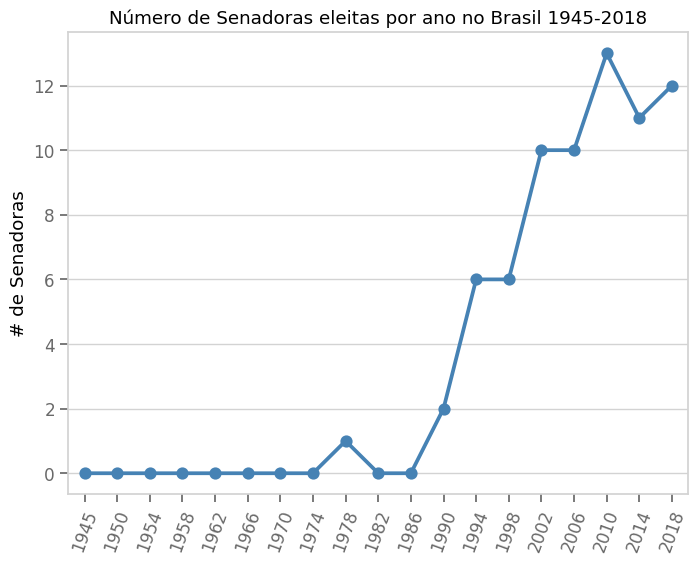

In [61]:
fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(
    data=senado_br,
    x='Year', y='Total women',
    color='steelblue',
    ax=ax,
)

plt.xticks(rotation=70) # Rotaciona labels

plt.title("Número de Senadoras eleitas por ano no Brasil 1945-2018")
plt.xlabel('')
plt.ylabel("# de Senadoras")

<span style="color:red"> *O código acima gerou um gráfico semelhante ao anterior, porém com pontos dispostos ao longo da linha. Cada ponto representa um ano no eixo x.*

Poderíamos ter múltiplas linhas representando categorias diferentes (usando a informação de uma terceira coluna do DataFrame).

/var/folders/mj/j3hv11_n2k52jb10d4y2k5d00000gn/T/ipykernel_76476/1416379492.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  sns.pointplot(


<Axes: xlabel='Year', ylabel='Total women'>

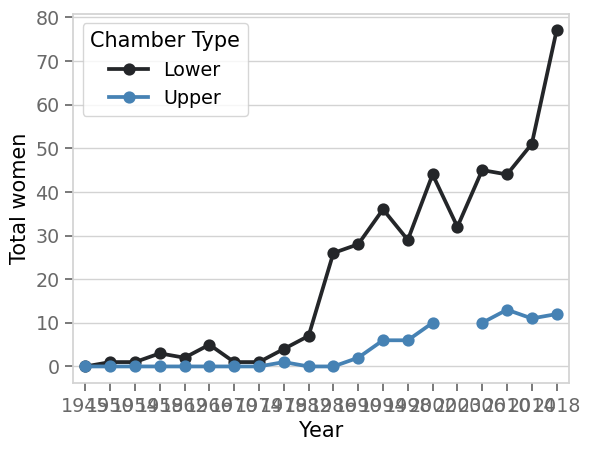

In [23]:
sns.pointplot(
    data=df_historico_br.drop_duplicates(['Chamber Type','Year'], keep='last'),
    x='Year', y='Total women',
    color='steelblue',
    hue='Chamber Type',
)


<span style="color:red"> *O código acima retornou um gráfico com duas linhas. Ambas as linhas possuem pontos que representam cada ano do eixo x. No canto superior esquerdo, há uma legenda que nos informa o Chamber Type. A linha superior corresponde ao Lower e a linha inferior ao Upper.*

Poderíamos melhorar também esse último gráfico exibindo as 2 linhas, como fizemos anteriormente.

Esse ajuste pode ser utilizado como um exercício.

In [24]:
# Ajuste o gráfico acima

# Exibindo distribuições - como podemos incluir estatística inferencial?

Vamos comparar a Europa e Oriente Médio (MENA).

In [25]:
regions = ['EUR', 'MENA']
df_eur_mena = df_historico_mulheres.query("Region in @regions and Year > 2000")

## Podemos ver a distribuição num histograma

<Axes: xlabel='% Of Women in Chamber', ylabel='Count'>

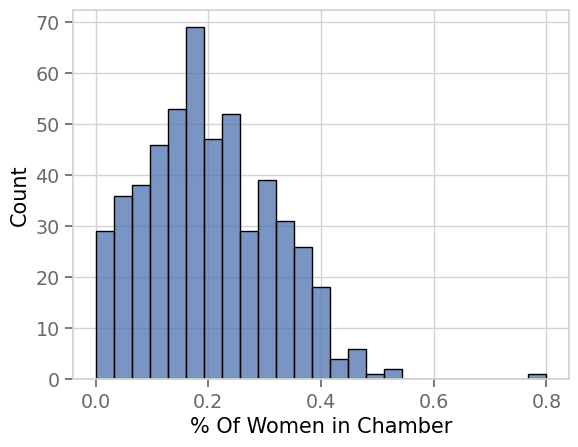

In [26]:
sns.histplot(
    data=df_eur_mena,
    x='% Of Women in Chamber',
    bins=25
)

<span style="color:red"> *O código acima retornou um gráfico de barras. O eixo y possui o título "Count" e compreende o intervalo entre 10 e 70. O eixo x possui o título "% Of Women in Chamber" e abrange o intervalo entre 0,0 e 0,8. As barras estão concentradas no canto esquerdo, entre 0,0 e 0,5.*

## Boxplot

<Axes: xlabel='% Of Women in Chamber'>

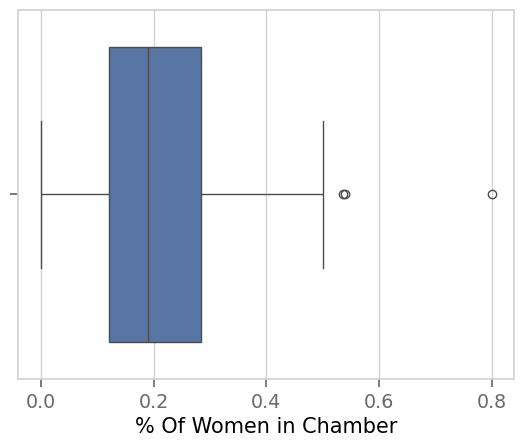

In [27]:
sns.boxplot(
    data=df_eur_mena,
    x='% Of Women in Chamber'
)

<span style="color:red"> *O código acima retornou um gráfico boxplot. O eixo x possui o título "% Of Women in Chamber" e abrange o intervalo entre 0,0 e 0,8. A "caixa" está concentrada no canto esquerdo.*

Podemos preferir ver esse gráfico com a caixa na vertical. Vamos ajustar o gráfico

<Axes: ylabel='% Of Women in Chamber'>

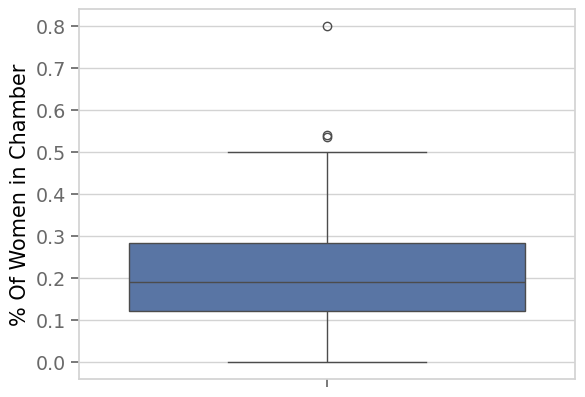

In [28]:
sns.boxplot(
    data=df_eur_mena,
    y='% Of Women in Chamber'
)

<span style="color:red"> *O código acima retornou um gráfico boxplot semelhante ao anterior. Dessa vez, é o eixo y que possui o título "% Of Women in Chamber" e abrange o intervalo entre 0,0 e 0,8. A "caixa" está concentrada na parte de baixo.*

Podemos adicionar um novo parâmetro para plotar caixas diferentes para categorias diferentes dos dados. Vamos adicionar diferentes regiões mantendo a orientação vertical da caixa.

Text(0, 0.5, '% Mulheres Eleitas')

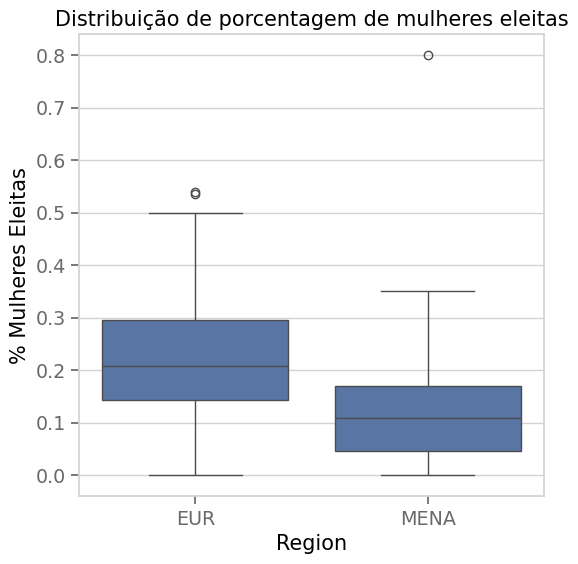

In [29]:
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(
    data=df_eur_mena,
    y='% Of Women in Chamber',
    x='Region',
    ax=ax
)

ax.set_title("Distribuição de porcentagem de mulheres eleitas")
ax.set_ylabel("% Mulheres Eleitas")



<span style="color:red"> *O código acima retornou um gráfico boxplot com duas figuras. O título do gráfico aparece ao topo: "Distribuição de porcentagem de mulheres eleitas". O eixo x possui o título "Region" e indica as regiões EUR e MENA. O eixo y possui o título "%Mulheres Eleitas" e abrange o intervalo entre 0,0 e 0,8.* A região EUR possui a figura mais acima.*

E se quisermos adicionar também a média nesse gráfico? Podemos fazer isso manualmente:

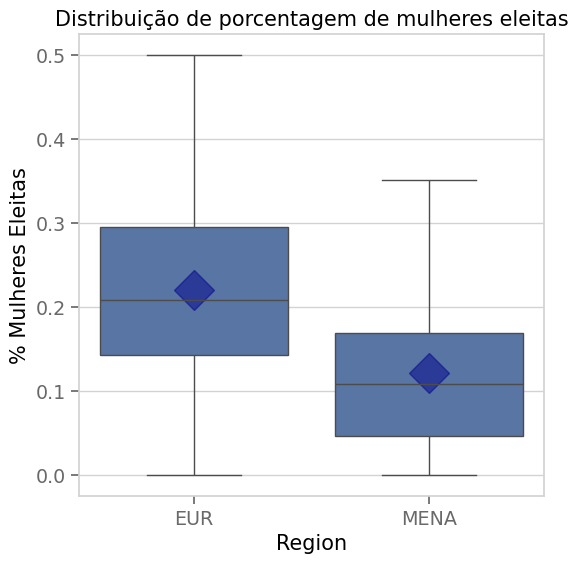

In [30]:
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(
    data=df_eur_mena,
    y='% Of Women in Chamber',
    x='Region',
    showfliers=False, # Essa linha Removve outliers
    ax=ax
)

ax.set_title("Distribuição de porcentagem de mulheres eleitas")
ax.set_ylabel("% Mulheres Eleitas")

# a partir daqui adicionamos a média
media_eur = df_eur_mena.query("Region == 'EUR'")['% Of Women in Chamber'].mean()
media_mena = df_eur_mena.query("Region == 'MENA'")['% Of Women in Chamber'].mean()

ax.plot(0, media_eur, "D", markersize=20, color="darkblue", alpha=0.5)
ax.plot(1, media_mena, "D", markersize=20, color="darkblue", alpha=0.5)

Por fim, podemos incluir informações

## Violin plot

AttributeError: PolyCollection.set() got an unexpected keyword argument 'showfliers'

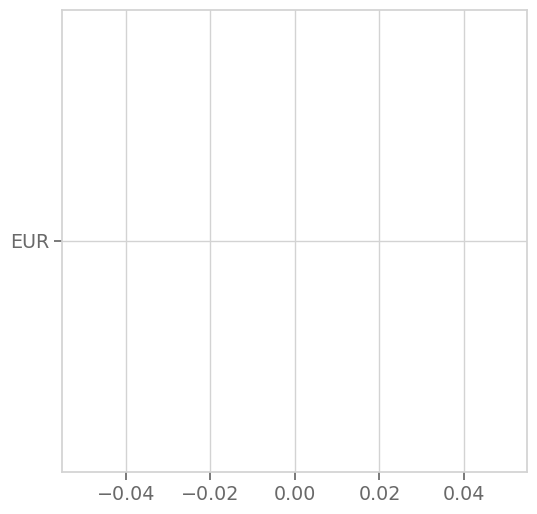

In [31]:
fig, ax = plt.subplots(figsize=(6,6))

sns.violinplot(
    data=df_eur_mena,
    x='% Of Women in Chamber',
    y='Region',
    showfliers=False, # Essa linha Removve outliers
    ax=ax
)

ax.set_title("Distribuição de porcentagem de mulheres eleitas")
ax.set_ylabel("% Mulheres Eleitas")

<span style="color:red"> *O código acima retornou um gráfico violin plot. As informações são as mesmas do gráfico anterior, porém representadas através de figuras diferentes. Não estamos mais tratando de "caixas" mas de imagens que parecem, em alguma medida, violinos. O gráfico agora está orientado na horizontal. Ou seja, o eixo x indica as regiões EUR e MENA. O eixo y possui o título "% Of Women in Chamber" e abrange o intervalo entre 0,0 e 0,8.*

Com teste-t

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t, p_val = ttest_ind(
    df_eur_mena.query("Region == 'EUR'")['% Of Women in Chamber'].dropna(),
    df_eur_mena.query("Region == 'MENA'")['% Of Women in Chamber'].dropna(),
)


In [ ]:
t = round(t, 2)
if p_val < .05:
    p = "< .05"
else:
    p = f"= {str(round(p_val, 2))}"
    
info_teste = f"t(104) = {t}, p {p}"

Vamos plotar

Text(0.4, -0.2, 't(104) = 8.46, p < .05')

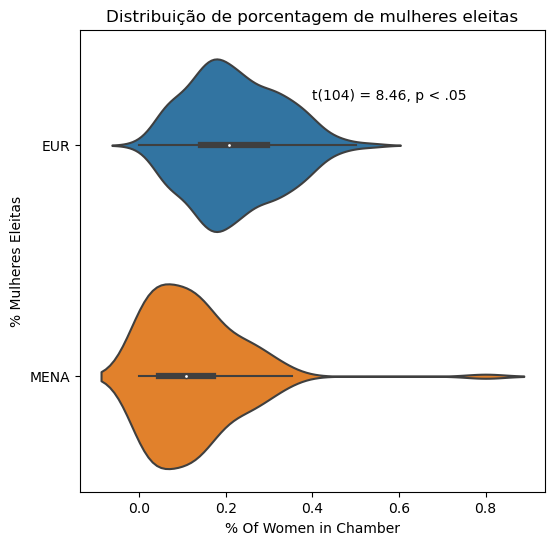

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

sns.violinplot(
    data=df_eur_mena,
    x='% Of Women in Chamber',
    y='Region',
    showfliers=False, # Essa linha Removve outliers
    ax=ax
)

ax.set_title("Distribuição de porcentagem de mulheres eleitas")
ax.set_ylabel("% Mulheres Eleitas")

# a partir daqui adicionamos info do teste
ax.text(0.4, -0.2, info_teste)

<span style="color:red"> *As informações do teste foram adicionadas ao gráfico anterior.*

## Faria mais sentido incluir essa informação no boxplot.

Vamos exibir agora o boxplot com as informações do teste-t. Veja que foi necessário ajustar a localização do texto.

Text(0.7, 0.4, 't(104) = 8.46, p < .05')

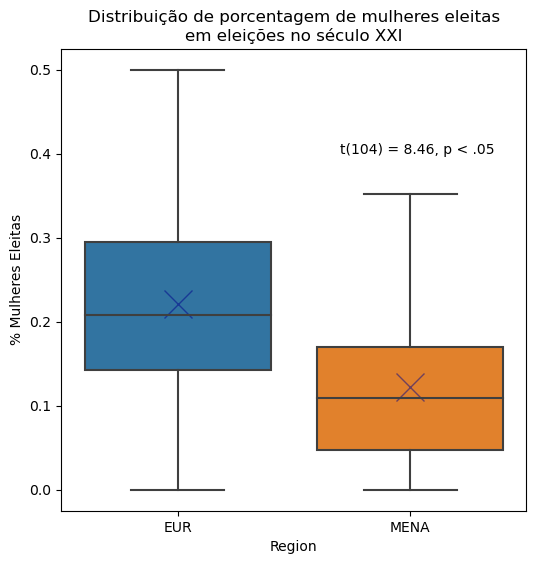

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(
    data=df_eur_mena,
    y='% Of Women in Chamber',
    x='Region',
    showfliers=False, # Essa linha Removve outliers
    ax=ax
)

ax.set_title("Distribuição de porcentagem de mulheres eleitas\nem eleições no século XXI")
ax.set_ylabel("% Mulheres Eleitas")

# a partir daqui adicionamos a média
media_eur = df_eur_mena.query("Region == 'EUR'")['% Of Women in Chamber'].mean()
media_mena = df_eur_mena.query("Region == 'MENA'")['% Of Women in Chamber'].mean()

ax.plot(0, media_eur, "x", markersize=20, color="darkblue", alpha=0.5)
ax.plot(1, media_mena, "x", markersize=20, color="darkblue", alpha=0.5)
ax.text(0.7, 0.4, info_teste)

<span style="color:red"> *O código acima retornou o gráfico boxplot anterior com algumas alterações. As médias correspondentes às regiões estão agora representadas por meio de losangos. A escala do eixo y também foi ajustada e compreende o intervalo de 0,0 até 0,5.*

## Regressão 

O exemplo final exige que várias camadas de plots sejam feitas em sequência. Lembrando, queremos reproduzir um dos gráficos do VII Relatório do Projeto Supremo em Números: Supremo Tributário.

[A figura 2.1.16 se encontra na página 64 do relatório.](https://direitorio.fgv.br/sites/default/files/2022-03/d0a07aec072af0d8b339a08316385438.pdf).

Vamos carregar os dados

In [ ]:
ranking_ufs2016_completo = pd.read_csv("https://bit.ly/2Ab47oB")

# pib originalmente estava em milhões nos dados
ranking_ufs2016_completo["pib_bi"] = ranking_ufs2016_completo["pib"] / 1000

ranking_ufs2016_completo.head(2)

,uf,soi,nome_uf,pib,controled,pib_bi
0,SC,1421,Santa Catarina,277192.0,5.13,277.192
1,RS,2081,Rio Grande do Sul,423151.0,4.92,423.151


Um regplot simples a partir desses dados segue a mesma lógica das demais funções do seaborn:

<AxesSubplot: xlabel='pib_bi', ylabel='soi'>

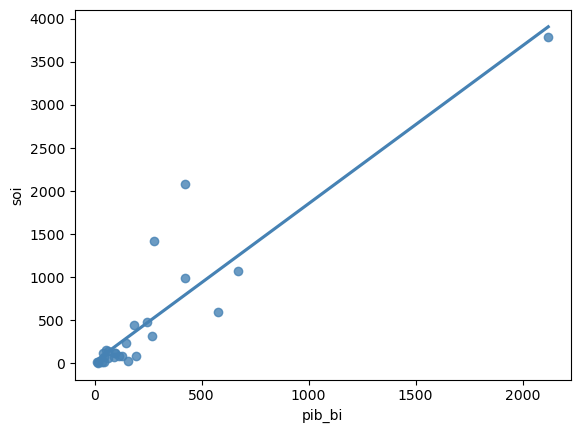

In [ ]:
sns.regplot(
    x="pib_bi",
    y="soi",
    data=ranking_ufs2016_completo,
    ci=None,
    color="steelblue",
)


O código final (com alguma simplificação em revisão desta apostila) a partir dos dados já processados fica assim:

Text(0.5, 1.0, 'Correlação entre PIB estadual e número de processos\nsobre direito tributário no STF (2016)')

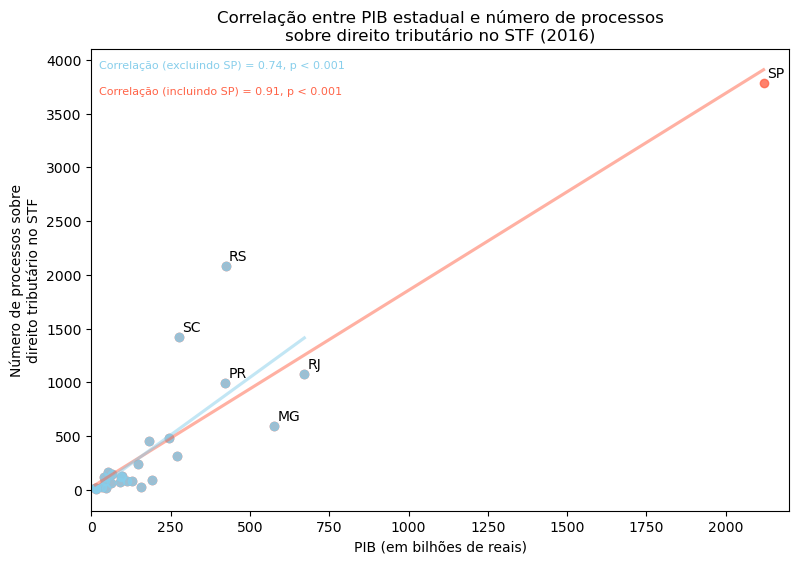

In [ ]:
from scipy.stats import pearsonr

fig, ax = plt.subplots(figsize=(9,6))

# 2 plots para exíbilos na mesma figura. A ordem em que eles são feitas é importante!
# Queremos todos os estados exceto SP fiquem em azul
sns.regplot(
    x="pib_bi",
    y="soi",
    data=ranking_ufs2016_completo,
    ci=None,
    scatter=True,
    color="tomato",
    line_kws={"alpha": 0.5},
    ax=ax,
)
sns.regplot(
    x="pib_bi",
    y="soi",
    data=ranking_ufs2016_completo.query("uf != 'SP'"),
    ci=None,
    scatter=True,
    color="skyblue",
    line_kws={"alpha": 0.5},
    ax=ax,
)
# Limita o eixo X para recortar a imagem
plt.xlim([0, 2200])

# esse for itera sobre as linhas para incluir o nome apenas de alguns estados
for i, r in ranking_ufs2016_completo.iterrows():
    # Vamos adicionar texto para os estados selecionados
    # UTilizamos os valores do  eixo x e y ajustado para posicionar o texto
    if r.soi > 800 or r.pib_bi > 300:
        plt.text(x=r.pib_bi + 10, y=r.soi + 50, s=r.uf)


# Aqui estamos fazendo o teste de correlação para todos e excluindo SP
complete_r, complete_p = pearsonr(
    ranking_ufs2016_completo["soi"], ranking_ufs2016_completo["pib_bi"]
)
no_sp_r, no_sp_p = pearsonr(
    ranking_ufs2016_completo.query("uf != 'SP'")["soi"],
    ranking_ufs2016_completo.query("uf != 'SP'")["pib_bi"],
)

# Incluindo textos do teste de correlação
plt.text(
    25,
    3680,
    f"Correlação (incluindo SP) = {round(complete_r, 2)}, p < 0.001",
    fontsize=8,
    color="tomato",
)
plt.text(
    25,
    3920,
    f"Correlação (excluindo SP) = {round(no_sp_r, 2)}, p < 0.001",
    fontsize=8,
    color="skyblue",
)

# Ajustado acessórios como desejado
plt.ylabel("Número de processos sobre\ndireito tributário no STF")
plt.xlabel("PIB (em bilhões de reais)")

plt.title(
    "Correlação entre PIB estadual e número de processos\nsobre direito tributário no STF (2016)"
)


<span style="color:red"> *O código acima retornou um gráfico com o título "Correlação entre PIB estadual e número de processos sobre direito tributário no STF (2016)". O eixo y abrange o intervalo entre 0 e 4000 e possui o título "Número de processos sobre direito tributário no STF". O eixo x abrange o intervalo entre 0 e 2000 e possui o título "PIB (em bilhões de reais)". Uma linha laranja traçada na diagonal de baixo para cima indica a correlação (incluindo SP). Uma linha azul menor direcionada no mesmo sentido indica a correlação (excluindo SP). Os estados SC, RS, PR, RJ e MG são representados por meio de pontos azuis no canto inferior esquerdo.*

Podemos dividir esse código em algumas partes. Primeiro desenhamos as 2 linhas de regressão e seus pontos. Depois, adicionamos o texto aos estados desejados. Por fim, geramos o texto do teste de correlação e o adicionamos no local desejado.

Cada uma dessas tarefas envolveu uma série de ajustes e refinamentos até a decisão pelo gráfico final.